In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#load the data
spacex = pd.read_csv('/content/SpaceX_Launches_Data.csv')
spacex.head(1)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857


In [4]:
#let's get a look at the dataset
spacex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
dtypes: bool(3), float64(4), int64(3), obj

In [5]:
# Missing data

spacex.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [6]:
spacex[['PayloadMass']].describe()

,PayloadMass
count,90.000000
mean,6123.547647
std,4732.115291
min,350.000000
25%,2510.750000
50%,4701.500000
75%,8912.750000
max,15600.000000


<Axes: >

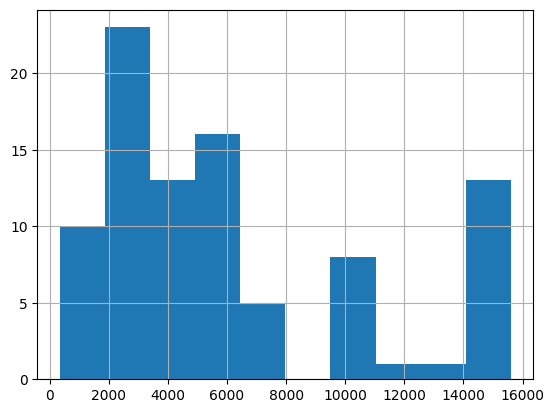

In [7]:
spacex['PayloadMass'].hist()


<Axes: >

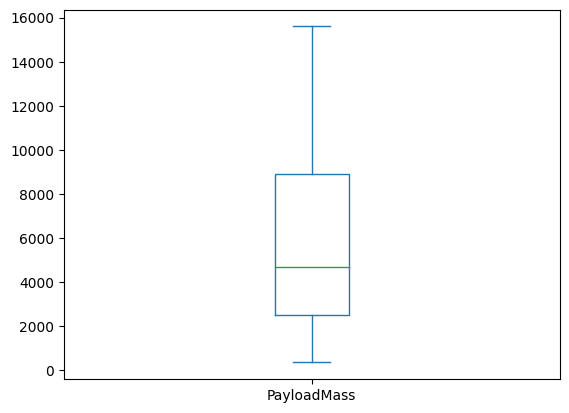

In [8]:
spacex['PayloadMass'].plot(kind='box')


In [9]:
launch_sites_count = spacex.groupby('LaunchSite').size().reset_index(name = 'count')
launch_sites_count

,LaunchSite,count
0,CCSFS SLC 40,55
1,KSC LC 39A,22
2,VAFB SLC 4E,13


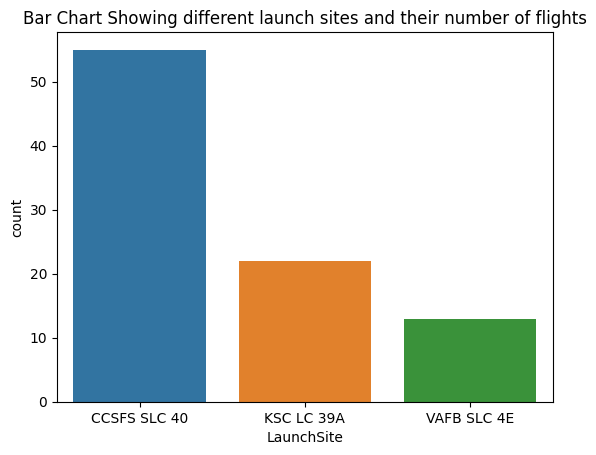

In [10]:
sns.barplot(x= 'LaunchSite', y ='count', data = launch_sites_count )
plt.title('Bar Chart Showing different launch sites and their number of flights')
plt.show()

In [11]:
#Let's look at the number and occurrence of each orbit in the column Payload Orbit
payloadorbitcount = spacex.groupby('Orbit').size().reset_index(name ='count')
payloadorbitcount

,Orbit,count
0,ES-L1,1
1,GEO,1
2,GTO,27
3,HEO,1
4,ISS,21
5,LEO,7
6,MEO,3
7,PO,9
8,SO,1
9,SSO,5


Text(0.5, 1.0, 'Bar Chart Showing SpaceX Orbits and the number of Flights')

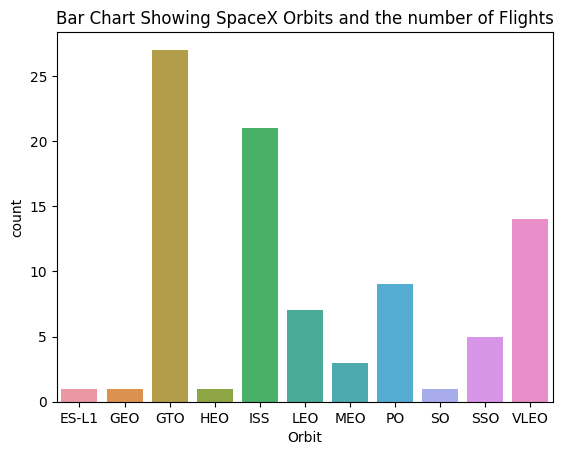

In [12]:
sns.barplot(x='Orbit', y='count', data=payloadorbitcount)
plt.title('Bar Chart Showing SpaceX Orbits and the number of Flights')


In [13]:
#Let's take a look at the landing outcomes
landing_outcomes = spacex['Outcome'].value_counts()
landing_outcomes

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [14]:
#let's create a key for the landing outcomes
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [15]:
#categorize the landing outcomes using the keys into bad outcomes and good outcomes
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])

good_outcomes = set(landing_outcomes.keys()[[0,2,4]])
#let's create an array called landing class, that labels good outcomes to 1, and bad outcomes to 0
landing_class = [0 if outcome in bad_outcomes else 1 for outcome in spacex['Outcome']]
#create a column called Class into the spacex dataset and assign the landingclass values to it.
spacex['Class']=landing_class
spacex.head(2)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0


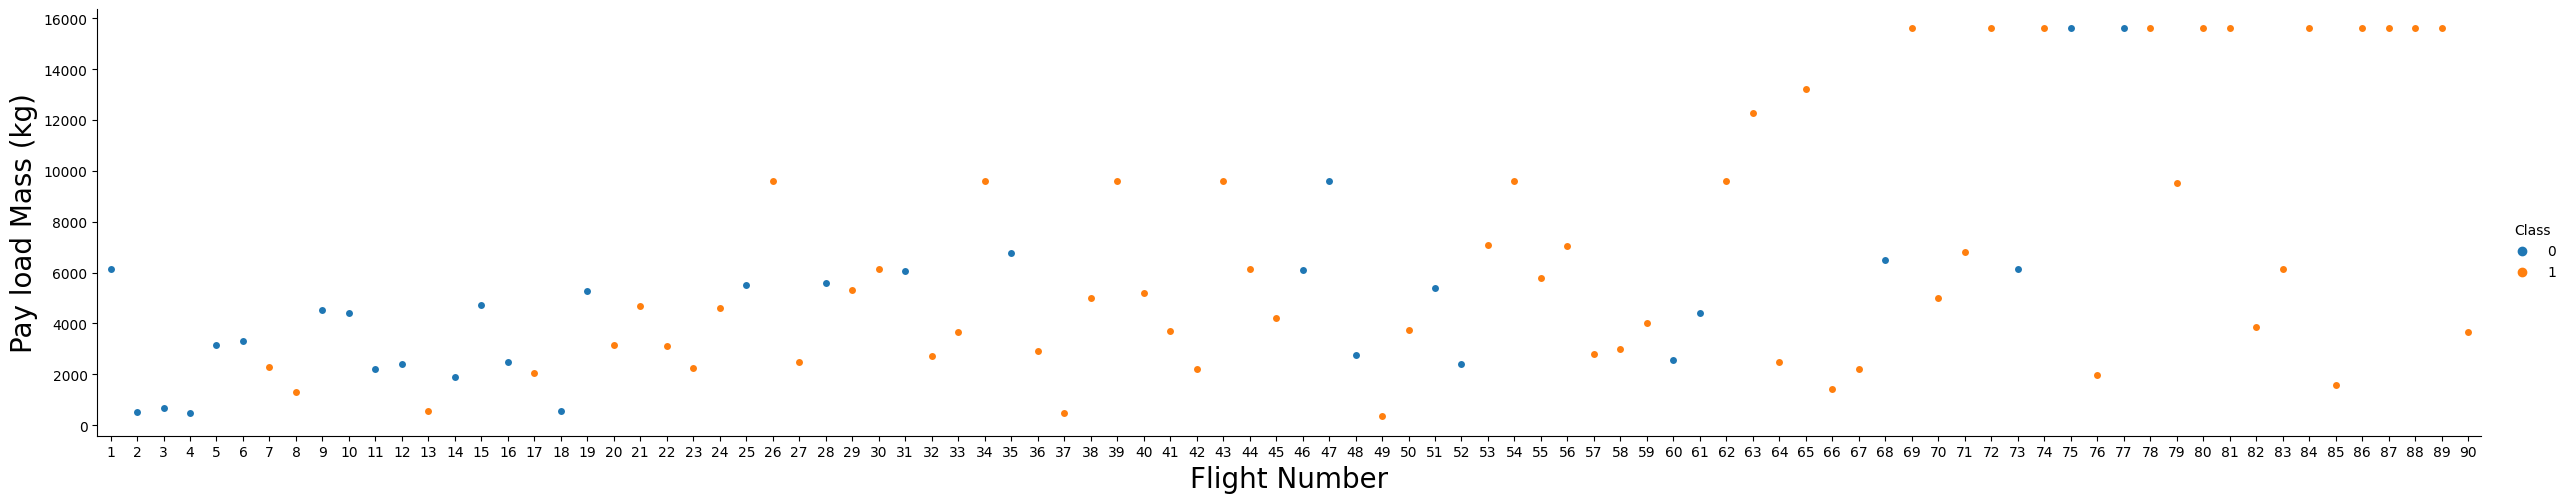

In [16]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=spacex, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()


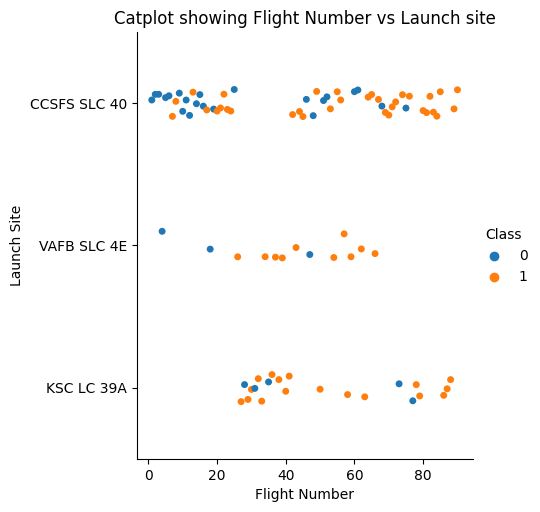

In [17]:
#Visualize the relationship between Flight Number and Launch Site
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data = spacex)
plt.title('Catplot showing Flight Number vs Launch site')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.show()

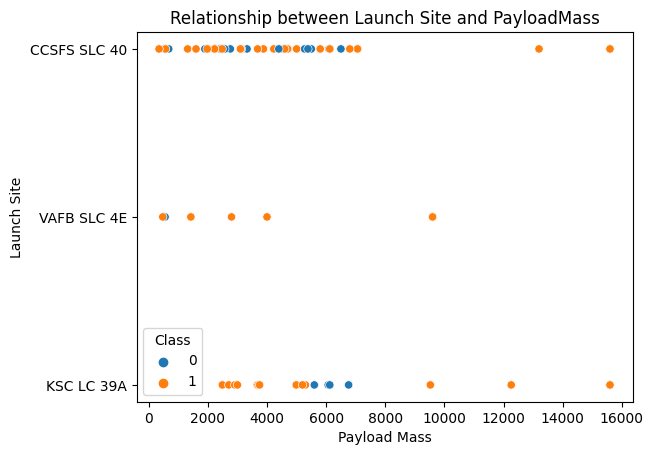

In [18]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.scatterplot(x='PayloadMass', y='LaunchSite', hue='Class', data = spacex)
plt.title('Relationship between Launch Site and PayloadMass')
plt.xlabel('Payload Mass')
plt.ylabel('Launch Site')
plt.show()


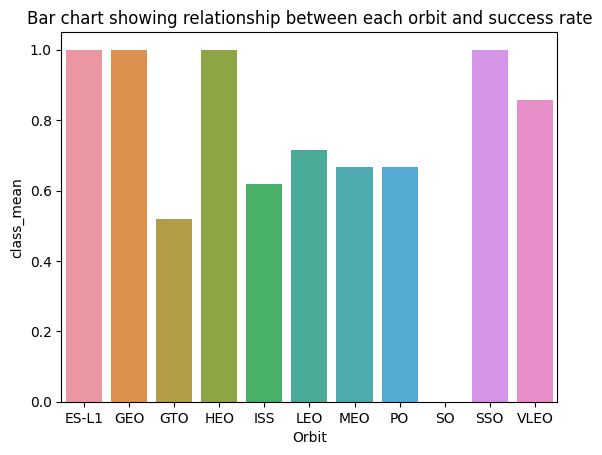

In [19]:
success_rate_orbit = spacex.groupby('Orbit')['Class'].mean().reset_index(name='class_mean')
sns.barplot(x='Orbit', y='class_mean', data = success_rate_orbit)
plt.title('Bar chart showing relationship between each orbit and success rate')
plt.show()

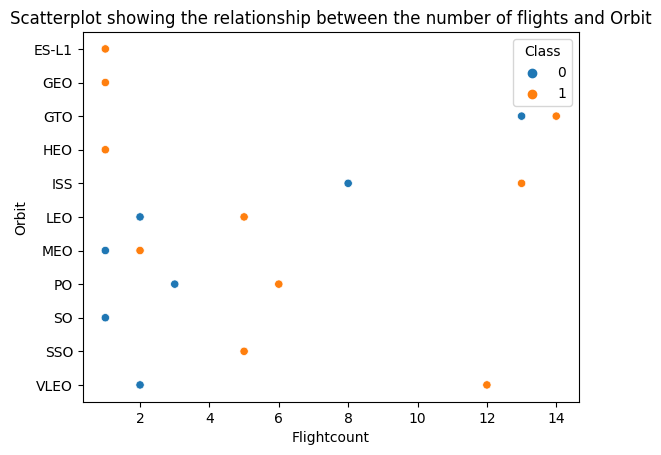

In [20]:
orbit_flight = spacex.groupby(['Orbit', 'Class'])['FlightNumber'].size().reset_index(name='Flightcount')
sns.scatterplot(x='Flightcount', y='Orbit', hue='Class', data=orbit_flight)
plt.title('Scatterplot showing the relationship between the number of flights and Orbit')
plt.show()

In [21]:
# A function to Extract years from the date
year=[]
def Extract_year():
    for i in spacex["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
spacex['Date'] = year

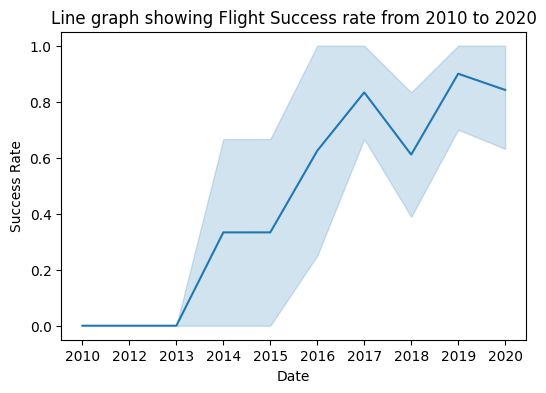

In [22]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
plt.figure(figsize = (6,4))
sns.lineplot(x='Date', y='Class', data = spacex)
plt.title('Line graph showing Flight Success rate from 2010 to 2020')
plt.ylabel('Success Rate')
plt.show()

<ipython-input-23-a6be2f121bd6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(spacex.corr(), cmap="OrRd",annot=True)


<Axes: >

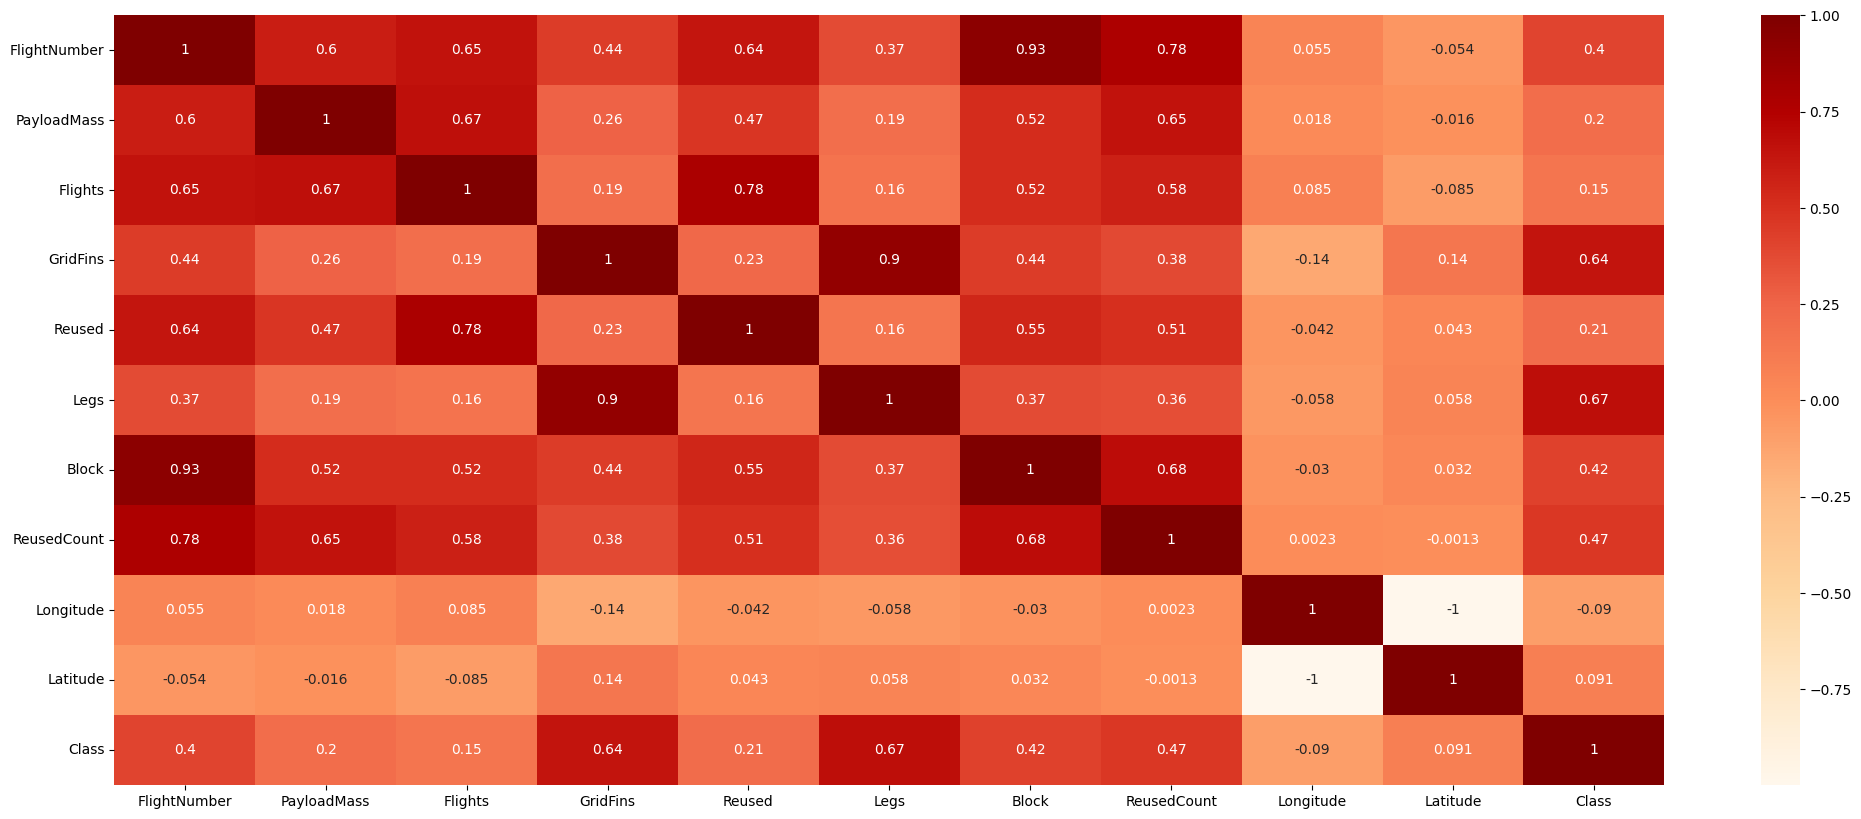

In [23]:
#correlation heatmap of data
plt.figure(figsize = (25,10))
sns.heatmap(spacex.corr(), cmap="OrRd",annot=True)

In [24]:
#lets import all the libraries needed
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#let's select all the data we will be using to train the model
features = spacex[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [25]:
#let's do some one hot encoding
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial', 'GridFins', 'Reused', 'Legs'])
features_one_hot = features_one_hot.astype('float64')
X = pd.concat([features_one_hot,spacex[['FlightNumber','PayloadMass', 'Flights','Block', 'ReusedCount' ]] ], axis = 1)
#let's standardize the data
X= preprocessing.StandardScaler().fit(X).transform(X)
Y = spacex['Class'].to_numpy()
#let's use the train split function to test and train the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [26]:
#let's select the parameters
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
#let's create a logistic regression object
lr=LogisticRegression()
#let's create a gridsearch object
grid_search = GridSearchCV(lr, parameters, cv=10)

logreg_cv = grid_search.fit(X_train, Y_train)
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8238095238095238


In [27]:
#let's check the accuracy using the method score
logreg_cv.score(X_test, Y_test)

0.9130434782608695

In [29]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier(max_features='sqrt')
grid_search = GridSearchCV(tree, parameters, cv = 10)
tree_cv = grid_search.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 16, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.8785714285714284


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [30]:
tree_cv.score(X_test, Y_test)

0.9130434782608695

In [31]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

gridsearch = GridSearchCV(KNN, parameters, cv = 10)
knn_cv = gridsearch.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
accuracy : 0.8380952380952381


In [32]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
accuracy : 0.8380952380952381


In [33]:
knn_cv.score(X_test, Y_test)

0.9130434782608695

Model Evaluation


In [35]:
print('Accuracy for Logistics Regression method:', logreg_cv.score(X_test, Y_test))
print('Accuracy for Decision tree method:', tree_cv.score(X_test, Y_test))
print('Accuracy for K nearest neighbors method:', knn_cv.score(X_test, Y_test))


Accuracy for Logistics Regression method: 0.9130434782608695
Accuracy for Decision tree method: 0.9130434782608695
Accuracy for K nearest neighbors method: 0.9130434782608695
